In [135]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import math

In [136]:
signal=[]
time=[]
nol=[]
start=0
fd=1/0.003
with open('biotelemetriy_laba.csv','r') as file:
    for i in file:
        i=i[:-1]
        signal.append(float(i))
        time.append(start)
        start+=0.003
        nol.append(0)
print(signal)
print(time)

[-0.784, -0.004, 0.051, -0.138, -0.114, -0.028, -0.062, -0.101, -0.074, -0.059, -0.075, -0.078, -0.07, -0.071, -0.074, -0.073, -0.073, -0.073, -0.073, -0.073, -0.073, -0.073, -0.073, -0.074, -0.073, -0.073, -0.072, -0.072, -0.072, -0.072, -0.073, -0.074, -0.073, -0.071, -0.071, -0.071, -0.072, -0.072, -0.073, -0.073, -0.072, -0.071, -0.071, -0.071, -0.071, -0.072, -0.072, -0.071, -0.069, -0.069, -0.07, -0.071, -0.071, -0.071, -0.071, -0.071, -0.07, -0.069, -0.068, -0.069, -0.069, -0.069, -0.069, -0.069, -0.068, -0.068, -0.067, -0.067, -0.067, -0.067, -0.067, -0.066, -0.065, -0.064, -0.064, -0.065, -0.065, -0.065, -0.065, -0.064, -0.062, -0.062, -0.062, -0.062, -0.062, -0.062, -0.061, -0.061, -0.06, -0.06, -0.06, -0.059, -0.059, -0.06, -0.059, -0.057, -0.056, -0.058, -0.059, -0.059, -0.058, -0.059, -0.06, -0.059, -0.058, -0.059, -0.059, -0.059, -0.059, -0.059, -0.059, -0.059, -0.058, -0.058, -0.059, -0.059, -0.059, -0.059, -0.059, -0.06, -0.06, -0.059, -0.059, -0.059, -0.06, -0.059, -0.

In [137]:
fig, ax = plt.subplots()
ax.plot(time, signal, color="blue", label="сигнал")
ax.legend()
plt.show()

In [138]:
spectr=np.fft.fft(signal)
spectr = np.abs(spectr)

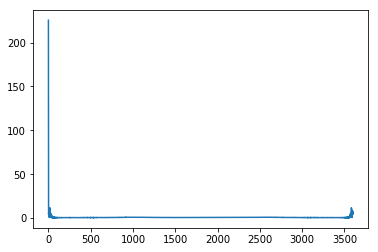

In [139]:
plt.plot(range(len(spectr)), spectr)
plt.show()

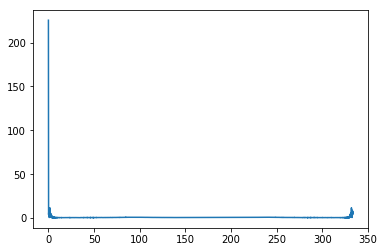

In [140]:
chastoty=[]
for i in range(0,len(signal)):
    chastoty.append(((1/0.003)/len(signal))*i)

plt.plot(chastoty, spectr)
plt.show()



In [141]:

time_new = np.linspace(0,9.990,len(time)*100) 
interp_signal = np.interp(time_new, time, signal) 
fig=plt.figure() 
plt.plot(time_new, interp_signal) 
plt.show()


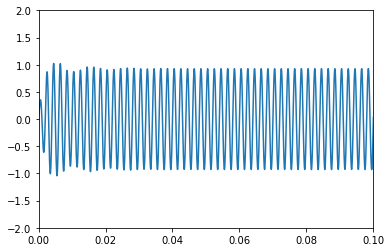

In [152]:
m = 1
modulated_signal = []
for i in range(0,len(interp_signal)):
    ms = (1 + m*interp_signal[i])*math.sin(2*math.pi*500*time_new[i])
    modulated_signal.append(ms)
fig=plt.figure() 
plt.plot(time_new, modulated_signal) 
plt.axis([0, 0.1, -2, 2])
plt.show()

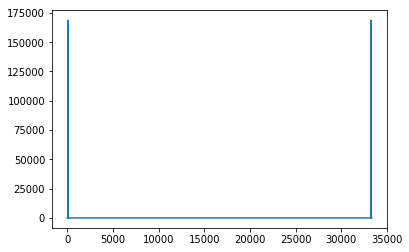

In [143]:
spectr_modulated=np.fft.fft(modulated_signal)
spectr_modulated = np.abs(spectr_modulated)
chastoty = []
fd =  1/0.00003
for i in range(0,len(modulated_signal)): 
    chastoty.append(i*fd/len(modulated_signal)) 
fig = plt.figure()
plt.plot(chastoty, spectr_modulated) 
plt.show()

In [144]:

def spectr_width(signal,nesuch,step1):
    energytotal = np.sum(signal)/2  
    energytotal1=0
    k = 0
    while(energytotal1/energytotal<0.99):
        energytotal1 = 0
        for i in range (0,nesuch+k,1):
            energytotal1 += signal[i]
        k += 1
    return k*step1
print(spectr_width(signal,0,fd/len(signal)))




16240.74074074074


(-2, 2)

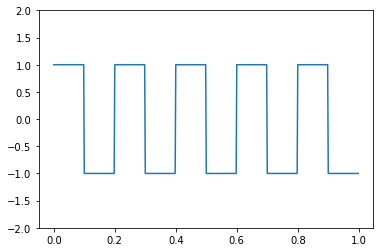

In [145]:
from scipy import signal 
import matplotlib.pyplot as plt 
t = np.linspace(0, 1, 500, endpoint=False) 
plt.plot(t, signal.square(2 * np.pi * 5 * t)) 
plt.ylim(-2, 2)

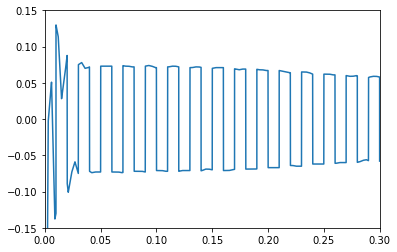

In [147]:
signal_norm_square = interp_signal * signal.square(10 * np.pi * 10 * time_new)
plt.axis([0, 0.3, -0.15, 0.15])
plt.plot(time_new, signal_norm_square)

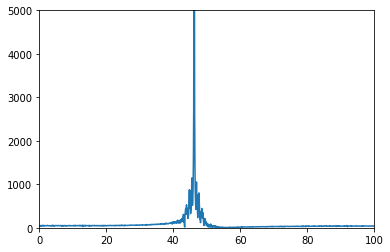

In [148]:
spectr_modulated=np.fft.fft(signal_norm_square)
spectr_modulated = np.abs(spectr_modulated)
chastoty = []
fd =  1/0.00003

for i in range(0,len(signal_norm_square)): 
    chastoty.append(i*fd/len(signal_norm_square))

fig = plt.figure()
plt.plot(chastoty, spectr_modulated) 
plt.axis([0, 100, 0, 5000])
plt.show()

Text(0.5, 1.0, 'Signal:orange - modulated_signal, blue - noise')

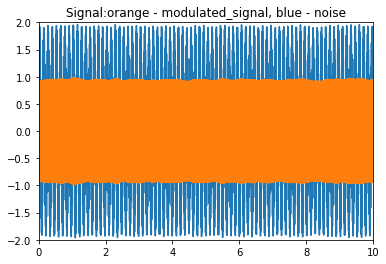

In [149]:
mean = 0
std = 1
num_samples = len(modulated_signal)
noise = np.sin(50 * time_new)
signal_and_noise = modulated_signal + noise #+ white_noise
plt.plot(time_new, signal_and_noise)
plt.plot(time_new, modulated_signal)
plt.axis([0, 10, -2, 2])
plt.title('Signal:orange - modulated_signal, blue - noise')


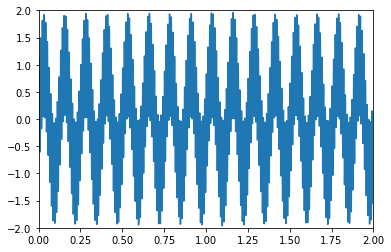

In [150]:
plt.axis([0, 2, -2, 2])
plt.plot(time_new, signal_and_noise)

Text(0.5, 1.0, 'Signal:orange - signal, blue - demod')

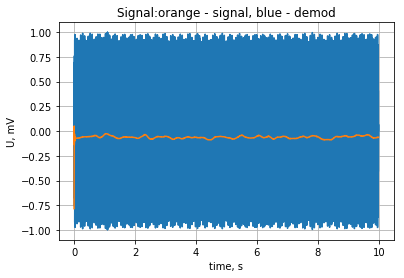

In [130]:
fd = 1 / 0.0003
f0 = fd * 50
w0 = 2 * math.pi * f0
m = 1
signal_demod = []
norm_signal_demod = []
norma_new_demod = max(np.abs(signal_and_noise))
norma_demod = max(np.abs(signal_and_noise))
for i in range(0, len(time_new)):
    signal_demod.append((signal_and_noise[i] / norma_new_demod) * math.sin((w0 * time_new[i])))
    norm_signal_demod.append(signal_and_noise[i] / norma_demod)
    #print(i)
plt.grid(True, which='both')

plt.plot(time_new, signal_demod)
plt.plot(time_new, interp_signal)


